<a href="https://colab.research.google.com/github/ardra1111/Neural-Networks/blob/main/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

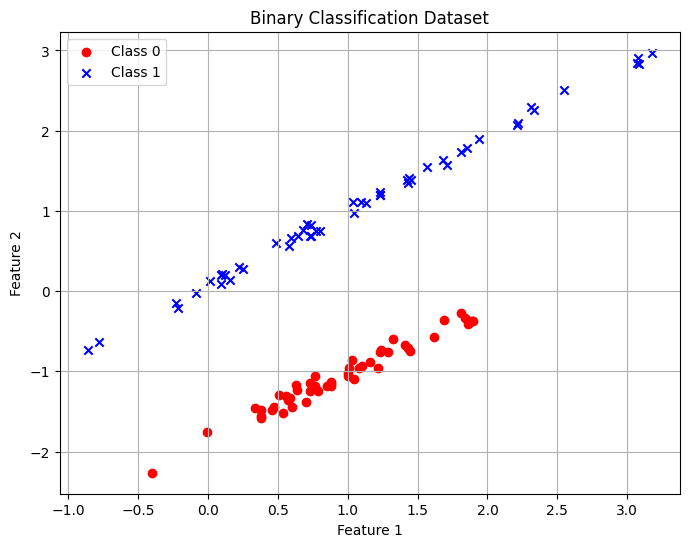

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a random binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
X.shape

(100, 2)

In [4]:
ones_column = np.ones((X.shape[0], 1))
ones_column.shape

(100, 1)

In [5]:
X = np.concatenate((ones_column,X),axis =1)

In [6]:
X.shape

(100, 3)

In [12]:
dataset = pd.DataFrame(X, columns=["x0","x1","x2"])

In [13]:
dataset.shape

(100, 3)

In [18]:
dataset['y'] = y

In [20]:
dataset

,x0,x1,x2,y
0,1.0,1.228312,-0.757178,0
1,1.0,0.698409,-1.380295,0
2,1.0,2.548817,2.502258,1
3,1.0,0.573579,-1.352979,0
4,1.0,0.585900,-1.337457,0
...,...,...,...,...
95,1.0,0.473358,-1.438620,0
96,1.0,1.233323,1.239336,1
97,1.0,0.460109,-1.487396,0
98,1.0,0.679631,0.757837,1


In [19]:
dataset.shape

(100, 4)

In [59]:

theta_initial = np.random.uniform(size=(3,))
misclassified_points_count = 100
while misclassified_points_count > 0:

  for i in range(0,100):

    misclassified_points_count = 0
    xi_vector = dataset.iloc[i,0:3]
    wieghted_sum = np.dot (theta_initial, xi_vector)

    if wieghted_sum and dataset.iloc[1,3] == 1:
       theta_final = theta_initial + xi_vector
       misclassified_points_count += 1

    elif wieghted_sum > 0 and dataset.iloc[1,3] == 0:
     theta_final = theta_initial - xi_vector
     misclassified_points_count += 1

    theta_initial = theta_final

In [83]:
def perceptron_learning_algorithm(dataset):
  theta_initial = np.random.uniform(size=(3,))
  misclassified_points_count = 100
  while misclassified_points_count > 0:
    for i in range(0,100):
      misclassified_points_count = 0
      xi_vector = dataset.iloc[i,0:3]
      wieghted_sum = np.dot (theta_initial, xi_vector)
      if wieghted_sum and dataset.iloc[1,3] == 1:
        theta_final = theta_initial + xi_vector
        misclassified_points_count += 1
      elif wieghted_sum > 0 and dataset.iloc[1,3] == 0:
        theta_final = theta_initial - xi_vector
        misclassified_points_count += 1
        theta_initial = theta_final
  return theta_initial


In [91]:
perceptron_learning_algorithm(dataset)

x0   -0.977670
x1   -0.900581
x2    1.123493
Name: 0, dtype: float64

**x0** is  the **bias term**, which is multiplied by 1 to account for the threshold.

**x1** and **x2** represent the **weights** corresponding to the features in the dataset.

**These weights define the decision boundary** separating the classes in the dataset.

In [68]:
import numpy as np

def perceptron_learning_algorithm_test(dataset, max_iterations=1000):
    """
    Learn the weights of a perceptron using the perceptron learning algorithm.

    Parameters:
        dataset (DataFrame): Input dataset containing features (x1, x2) and labels (y).
        max_iterations (int): Maximum number of iterations for the algorithm.

    Returns:
        ndarray: Learned weights for the perceptron.
    """
    theta_initial = np.random.uniform(size=(3,))
    misclassified_points_count = 100

    while misclassified_points_count > 0 and max_iterations > 0:
        misclassified_points_count = 0

        for i in range(len(dataset)):
            xi_vector = np.array([1] + dataset.iloc[i, 0:2].tolist())  # Add bias term
            weighted_sum = np.dot(theta_initial, xi_vector)

            if (weighted_sum > 0 and dataset.iloc[i, 2] == 0) or (weighted_sum <= 0 and dataset.iloc[i, 2] == 1):
                theta_initial = theta_initial + xi_vector * (1 if dataset.iloc[i, 2] == 0 else -1)
                misclassified_points_count += 1

        max_iterations -= 1

    # Return the learned weights
    return theta_initial


In [69]:
perceptron_learning_algorithm_test(dataset)

array([0.36546051, 0.7731484 , 0.3035587 ])

**x0** is  the **bias term**, which is multiplied by 1 to account for the threshold.

**x1** and **x2** represent the **weights** corresponding to the features in the dataset.

**These weights define the decision boundary** separating the classes in the dataset.